# INTRODUCTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Fall 2023 BIOINF575 Group 1 Project 1

Team Members:

  Maggie McGlothlin

  Jiahui Li

  Neil Zhao

  Qing-Xuan Lu

  Xinyi Deng



# Project Information

23andme provides the raw data regarding genetic variants for a sample provided by a customer in a tab separated file.

**The goal of this class project is to detect variants with drug effects as provided by PharmGKB.**

To connect the variants to the information available in the PharmGKB  data we need the var_drug_ann.tsv.

Columns in the 23andme_v5_hg19_ref.txt file are:
*  **CHR**: the chromosome number
*  **POS**: the position of the variant - position where the difference in nucleotides is found
*  **dbSNP_ID**: the variant identifier in the dbSNP database (https://www.ncbi.nlm.nih.gov/snp/)
  *  this field will contain a dot . when the SNP is not available in the dbSNP database
*  **ALLELE**: the nucleotides found at that position on the pair of chromosomes

Columns in the var_drug_ann.tsv file are:

*  **Variant Annotation ID**: unique ID number for each variant/drug annotation    
*  **Variant/Haplotypes**: dbSNP ID or haplotype(s)
*  **Gene**: HGNC symbol
*  **Drug(s)**: Drug name
*  **PMID**: PubMed identifier
*  **Phenotype Category**: options [efficacy, toxicity, dosage, metabolism/PK other]
*  **Significance**: yes or no – determined by if the author stated the association was significant
*  **Notes**: curator notes field
*  **Sentence**: structured sentence
*  **Alleles**: variant alleles in annotation
*  **Specialty Population**: tags for any special populations this annotation is relevant to (e.g. pediatric)

**And other columns**: Metabolizer types, isPlural, Is/Is Not associated, Direction of effect, PD/PK terms, Multiple drugs And/or, Population types, Population Phenotypes or diseases, Multiple phenotypes or diseases And/or, Comparison Allele(s) or Genotype(s), Comparison Metabolizer types

# Team Questions and Answers

In addition, **each team member has to provide an answer to the following three questions:**
1.   What was your biggest challenge in this project? (regarding writing code and not only)
2.   What did you learn while working on this project? (regarding writing code and not only)
3. If you had more time on the project, what other question(s) would you like to answer? (at least one question is required)

The answers written by each team member should be added in Markdown cells at the beginning of the notebook.

Maggie McGlothlin Response:

1. The biggest challenge for me was simply initiating the project and trying to consolidate all of the necessary project information into two main spaces: this colab and the repository. I wanted to ensure that the entire team could easily locate the relevant files and understand the tasks assigned to them.
2. I was glad to work with the task that I claimed. I never fully grasped the process of importing large datasets into my code. Therefore, alongside the lectures, I valued the hands-on experience of working with substantial datasets and the chance to break them down.
3. I am interested in collaborating with chemists to explore potential relationships between drug chemical structure and significant gene variant responses. We could enhance our existing code by incorporating additional information to analyze these properties more comprehensively.

Neil Zhao Response:

1. The biggest challenge was trying to relearn all of the relevant syntax coming from a research background that only used R. It was very counterintuitive to me on subsetting dataframes and the syntax that is used to perform such operations.

2. I am grateful for the task that was assigned to me. It was very manageable and I appreciate the group's effort and prompt communication (especially Maggie's task). I gained an appreciation of working on a collaboratory project and how to ensure working code that integrates with other tasks.

3.  I am very interested in examining whether certain genotypes confer higher efficacy regarding drugs and their associated diseases. It would also be very interesting in visualizing the proportions of different categories (i.e. histograms, raincloud plots) and validating with sensitivity analyses to see if there is correspondence with the 23_and_me allele variant calls versus the PharmGKB variant calls.


Xinyi Deng Response:


1. When completing the task, my main challenge was understanding the file read and save paths. Since we were using Google shared files, it was somewhat different from operating on my own computer. To ensure that the code can locate the files, I should upload the files to the relevant folder before each run.

2. I really enjoyed the task assigned to me because it not only helped me understand file reading and handling in a shared environment, but also, being a task in the middle of the sequence, I learned some methods to improve accuracy by analyzing the preceding code. For instance, testing with a subset of data before the full analysis.

3. I want to try investigate the potential interactions between different SNPs within the dataset. Are there synergistic or antagonistic effects when certain SNPs coexist? Understanding these interactions could provide more comprehensive insights into the genetic factors influencing drug responses.






Jiahui Li Response:
1. The biggest challenge for me was the "split" part. In this dataset, the data is not stored in a tidy way. It includes several gene symbols or drug names in the same row. It is important to notice those "different" cells in the data frame and think carefully about how to deal with those "weird" or "different" cells in the dataset. The details needed to be taken into account is much more than I expected.

2. I learned that always skim through the dataset before you try to deal with it. Sometimes, observing the first several lines is not enough. I should think more carefully and consider the potential problems when processing the data. Additionally, the output of the later coding part can help you to be aware of some details you ignored during coding. I realized some details were ignored and went back to modify my code when I saw the output in task 6.

3. I am interested in combining this dataset with clinical trial data to explore the genetic association with drug response for a specific disease/disease type. We could identify if some common genetic variants can influence drug effectiveness for the disease. We could also explore the reasons behind the commonly used drug or more efficient drug in clinical trials based on gene or genetic variant level.

Qing-Xuan Lu response:
1. The biggist challenege for me was to figure out and read through all the codes that my teammates done, and understand the same logic in different way of coding. Since this project was the first coding project for me, I would not sure that if my code was readable for others who worked with me.

2. I like the part I claimed. The data visualization is my favorite in coding because plots always get more straight forward than words. The thing I learned was how to apply codes in other tasks and turn into the way I can do my task.

3. I would be interested in within those number of drugs associated with a gene, how do these drugs interact with the protein generated from the gene. It might be  possible to analyze which drugs show more interaction with the gene therefore could narrow down the number of drugs and do more specific study.

# Project Tasks

The following tasks must be completed for this project:

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

##TASK 1 - Claimed by Maggie - DONE

**Map/merge** the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).


---

The merged result should have the following columns:

`dbSNP_ID, GENE_SYMBOL, DRUG_NAME, PMID, PHENOTYPE_CATEGORY, SIGNIFICANCE, NOTES, SENTENCE, ALLELE_PharmGKB (variant alleles in annotation), ALLELE_23andme (variant alleles in 23andme file)`

In [3]:
# Read the contents of the files into pandas dataframes
df_23_and_me = pd.read_csv('/content/23andme_v5_hg19_ref.txt', sep='\t', names=['CHR','POS','dbSNP_ID','ALLELE'])
df_23_and_me

,CHR,POS,dbSNP_ID,ALLELE
0,chr1,69869,rs548049170,T
1,chr1,74792,rs13328684,G
2,chr1,565508,rs9283150,G
3,chr1,726912,i713426,A
4,chr1,727841,rs116587930,G
...,...,...,...,...
638458,chrM,16524,i4000693,A
638459,chrM,16524,i704756,A
638460,chrM,16525,i705255,A
638461,chrM,16526,i4000757,G


In [6]:
df_var_drug = pd.read_csv('/content/var_drug_ann.tsv', sep='\t')
df_var_drug

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
0,1451834452,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17,...,Is,Associated with,decreased,metabolism of,NaN,NaN,NaN,NaN,*1,NaN
1,1451159680,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G,...,Is,Not associated with,increased,dose of,NaN,in people with,Other:an international normalized ratio (INR) ...,NaN,A,NaN
2,1183684657,CYP2D6 ultrarapid metabolizer genotype,CYP2D6,tramadol,18204346,Metabolism/PK,yes,"Median (+)R,R-tramadol area under the curve wa...",CYP2D6 ultra-metabolizer genotype is associate...,NaN,...,Is,Associated with,increased,metabolism of,NaN,in healthy individuals,NaN,NaN,NaN,poor metabolizer genotype
3,1451306860,CYP2C9*11,CYP2C9,warfarin,33350885,Dosage,not stated,"""This case suggests that CYP2C9 *11/*11 carrie...",CYP2C9 *11/*11 is associated with decreased do...,*11/*11,...,Is,Associated with,decreased,dose of,NaN,NaN,NaN,NaN,NaN,NaN
4,1448997750,"CYP2B6*1, CYP2B6*18",CYP2B6,efavirenz,16495778,Metabolism/PK,yes,Please note that in the paper the allele was r...,CYP2B6 *1/*18 is associated with increased con...,*1/*18,...,Is,Associated with,increased,concentrations of,NaN,in people with,Disease:HIV Infections,NaN,*1/*1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,1452261403,CYP2C19 poor metabolizer,CYP2C19,esomeprazole,37772804,Metabolism/PK,yes,"""According to the data summarized in Table S2 ...",CYP2C19 poor metabolizer is associated with in...,NaN,...,Is,Associated with,increased,exposure to,NaN,in healthy individuals,NaN,NaN,NaN,intermediate metabolizer
11540,1452261400,CYP2C19 rapid metabolizer,CYP2C19,esomeprazole,37772804,Metabolism/PK,yes,"""According to the data summarized in Table S2 ...",CYP2C19 rapid metabolizer is associated with d...,NaN,...,Is,Associated with,decreased,exposure to,NaN,in healthy individuals,NaN,NaN,NaN,intermediate metabolizer
11541,1452262396,rs1800629,TNF,"adalimumab, certolizumab pegol, golimumab, inf...",37763115,Efficacy,yes,"""We identified that 50/58 (86.2%) responders s...",Genotype GG is associated with increased clini...,GG,...,Is,Associated with,increased,clinical benefit to,or,in people with,Other:Behcet Syndrome,NaN,AG,NaN
11542,1452262728,rs1934968,CYP2C9,"apatinib, apatinib metabolite m1-1",37775332,Metabolism/PK,yes,"""CYP2C9 rs1934968 was also identified as a pre...",Genotype GG is associated with increased expos...,GG,...,Is,Associated with,increased,exposure to,and,in people with,Other:Neoplasms,NaN,AA + AG,NaN


In [7]:
# Combine both of the data frames using the rsID as the matching basis
mapped_df = pd.merge(df_23_and_me, df_var_drug, how='inner', left_on='dbSNP_ID', right_on='Variant/Haplotypes')
mapped_df

,CHR,POS,dbSNP_ID,ALLELE,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
0,chr1,3279268,rs11807862,T,1183685341,rs11807862,PRDM16,"atorvastatin, hmg coa reductase inhibitors, si...",24096969,Efficacy,...,Is,Associated with,decreased,response to,or,NaN,NaN,NaN,TT,NaN
1,chr1,7845695,rs228729,T,981954065,rs228729,PER3,lithium,21781277,Efficacy,...,Is,Not associated with,increased,response to,NaN,in people with,Disease:Bipolar Disorder,NaN,C,NaN
2,chr1,7863293,rs228642,C,981954077,rs228642,PER3,lithium,21781277,Efficacy,...,Is,Not associated with,increased,response to,NaN,in people with,Disease:Bipolar Disorder,NaN,T,NaN
3,chr1,7868725,rs228666,T,981954083,rs228666,PER3,lithium,21781277,Efficacy,...,Is,Not associated with,increased,response to,NaN,in people with,Disease:Bipolar Disorder,NaN,T,NaN
4,chr1,7887579,rs228697,C,981954089,rs228697,PER3,lithium,21781277,Efficacy,...,Is,Not associated with,increased,response to,NaN,in people with,Disease:Bipolar Disorder,NaN,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,chrX,151821277,rs3810651,T,1451104869,rs3810651,GABRQ,botulinum toxin type a,31014225,Efficacy,...,Is,Not associated with,NaN,response to,NaN,in women with,Other:Migraine NOS,NaN,A,NaN
5641,chrX,153311980,rs17435,T,827812222,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,...,Is,Associated with,NaN,response to,and,in people with,"Disease:Carcinoma, Hepatocellular",NaN,T,NaN
5642,chrX,153325446,rs1734787,A,827812230,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,...,Is,Associated with,NaN,response to,and,in people with,"Disease:Carcinoma, Hepatocellular",NaN,C,NaN
5643,chrX,153330920,rs1734791,A,827812238,rs1734791,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,...,Is,Associated with,NaN,response to,and,in people with,"Disease:Carcinoma, Hepatocellular",NaN,T,NaN


In [8]:
# Sort through the merged data frame for only the requested information
sorted_df = mapped_df[['dbSNP_ID', 'Gene', 'Drug(s)', 'PMID', 'Phenotype Category', 'Significance', 'Notes', 'Sentence', 'Alleles', 'ALLELE']]
sorted_df

,dbSNP_ID,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,ALLELE
0,rs11807862,PRDM16,"atorvastatin, hmg coa reductase inhibitors, si...",24096969,Efficacy,no,There could be strand confusion with this A/T ...,Genotype AA is associated with decreased respo...,AA,T
1,rs228729,PER3,lithium,21781277,Efficacy,no,NaN,Allele T is not associated with increased resp...,T,T
2,rs228642,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,C
3,rs228666,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,T
4,rs228697,PER3,lithium,21781277,Efficacy,no,NaN,Allele G is not associated with increased resp...,G,C
...,...,...,...,...,...,...,...,...,...,...
5640,rs3810651,GABRQ,botulinum toxin type a,31014225,Efficacy,no,No significant difference in allele frequency ...,Allele T is not associated with response to bo...,T,T
5641,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5642,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A
5643,rs1734791,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


In [9]:
# Rename the column names as given for the task
names = ['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme']
sorted_df.columns = names
sorted_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs11807862,PRDM16,"atorvastatin, hmg coa reductase inhibitors, si...",24096969,Efficacy,no,There could be strand confusion with this A/T ...,Genotype AA is associated with decreased respo...,AA,T
1,rs228729,PER3,lithium,21781277,Efficacy,no,NaN,Allele T is not associated with increased resp...,T,T
2,rs228642,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,C
3,rs228666,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,T
4,rs228697,PER3,lithium,21781277,Efficacy,no,NaN,Allele G is not associated with increased resp...,G,C
...,...,...,...,...,...,...,...,...,...,...
5640,rs3810651,GABRQ,botulinum toxin type a,31014225,Efficacy,no,No significant difference in allele frequency ...,Allele T is not associated with response to bo...,T,T
5641,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5642,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A
5643,rs1734791,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


## TASK 2 - Claimed by Neil

**Filter** the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (`PHENOTYPE_CATEGORY` is `efficacy`).

In [10]:
# Filter for significant associations and drug efficacy
filtered_df = sorted_df[(sorted_df["SIGNIFICANCE"] == "yes") & (sorted_df["PHENOTYPE_CATEGORY"] == "Efficacy")]

# Visually inspect the filtered DataFrame
filtered_df



,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
8,rs1801131,MTHFR,oxaliplatin,20385995,Efficacy,yes,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
9,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",27035272,Efficacy,yes,Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
11,rs1801131,MTHFR,methotrexate,25618758,Efficacy,yes,Alleles given as C and A. Efficacy of treatmen...,Genotype GT is associated with decreased respo...,GT,T
14,rs1801131,MTHFR,methotrexate,23198157,Efficacy,yes,Patients with the GG genotype had better overa...,Genotype GG is associated with increased respo...,GG,T
15,rs1801131,MTHFR,methotrexate,24386571,Efficacy,yes,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...,...,...,...
5636,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",23394390,Efficacy,yes,Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
5639,rs3810651,GABRQ,venlafaxine,23394390,Efficacy,yes,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
5641,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5642,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


In [12]:
#Optional logical checks to ensure the filter worked:
# Check the shape
original_row_count = sorted_df.shape[0]
filtered_row_count = filtered_df.shape[0]
print("Original Row Count:", original_row_count)
print("Filtered Row Count:", filtered_row_count)


# Use assertions
assert all(filtered_df["SIGNIFICANCE"] == "yes")
assert all(filtered_df["PHENOTYPE_CATEGORY"] == "Efficacy")

print("All checks passed.")

Original Row Count: 5645
Filtered Row Count: 1301
All checks passed.


##TASK 3 - Claimed by Xinyi

**Save** the output of the filtering step in a tab-separated file (23andme_PharmGKB_map.tsv) with the following columns:

`dbSNP_ID, GENE_SYMBOL, DRUG_NAME, NOTES, SENTENCE, ALLELE_PharmGKB, ALLELE_23andme`

In [13]:
# Task 3: Save the output to a tab-separated file
# Specify the columns to include in the output file
output_columns = ['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme']

In [14]:
# Select only the specified columns from the filtered DataFrame
filtered_output_df = filtered_df[output_columns]

In [15]:
# Save the filtered DataFrame to a tab-separated file
output_file_path = '/content/23andme_PharmGKB_map.tsv'
filtered_output_df.to_csv(output_file_path, sep='\t', index=False)

In [16]:
# Display the saved DataFrame
filtered_output_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
8,rs1801131,MTHFR,oxaliplatin,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
9,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
11,rs1801131,MTHFR,methotrexate,Alleles given as C and A. Efficacy of treatmen...,Genotype GT is associated with decreased respo...,GT,T
14,rs1801131,MTHFR,methotrexate,Patients with the GG genotype had better overa...,Genotype GG is associated with increased respo...,GG,T
15,rs1801131,MTHFR,methotrexate,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...
5636,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
5639,rs3810651,GABRQ,venlafaxine,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
5641,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5642,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


##TASK 4 - Claimed by Jiahui

**Create** a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data with the following columns:

`GENE_SYMBOL, DRUG_NAME, dbSNP_IDs (list of IDs separated by ";")`

In [17]:
def split_column_element(data,column_name,split_symbol):
    # splits the column string by split_symbol
    split_col = data[column_name].str.split(split_symbol)

    # creates a new dataframe with split column
    split_df = data.assign(**{column_name:split_col})

    # explodes the split data
    exploded_df = split_df.explode(column_name)

    # remove leading and trailing whitespaces and quotes
    exploded_df[column_name] = exploded_df[column_name].str.strip('" ')

    return exploded_df

# splits the elements in column "DRUG_NAME" and "GENE_SYMBOL"
gene_symbol_split_df = split_column_element(filtered_df,"GENE_SYMBOL",",")
drug_split_df = split_column_element(gene_symbol_split_df,"DRUG_NAME",",")

# creates a aggregation rule: take argument x, converts it to a set to remove duplicates and joins x by ";"
agg_rule = lambda x: ';'.join(set(x))

# Aggregates all "dbSNP_ID" grouped by "GENE_SYMBOL" and "DRUG_NAME" via aggregation rule
summary_df = drug_split_df.groupby(['GENE_SYMBOL','DRUG_NAME'])["dbSNP_ID"].apply(agg_rule)

# moves grouped columns back to regular columns and gives default index
summary_df = summary_df.reset_index()

# view the summary data
summary_df

,GENE_SYMBOL,DRUG_NAME,dbSNP_ID
0,ABCA1,atorvastatin,rs2230806
1,ABCA1,fenofibrate,rs2230806;rs2230808
2,ABCA1,rosuvastatin,rs2230806
3,ABCA1,simvastatin,rs2230806
4,ABCB1,antipsychotics,rs1128503
...,...,...,...
1057,ZNF432,fluticasone propionate,rs3752120
1058,ZNF432,fluticasone/salmeterol,rs3752120
1059,ZNF697,interferon beta-1a,rs10494227
1060,ZNF697,interferon beta-1b,rs10494227


In [18]:
# Save the summary dataframe to a tab-separated file
summary_df.to_csv("/content/23andme_PharmGKB_summary.tsv", sep="\t", index=False)

## TASK 5 - Claimed by Qing-Xuan

**Plot** the distribution (histogram) of the number of drugs associated with a gene, and the number of SNPs for a gene.

In [19]:
import matplotlib.pyplot as plt

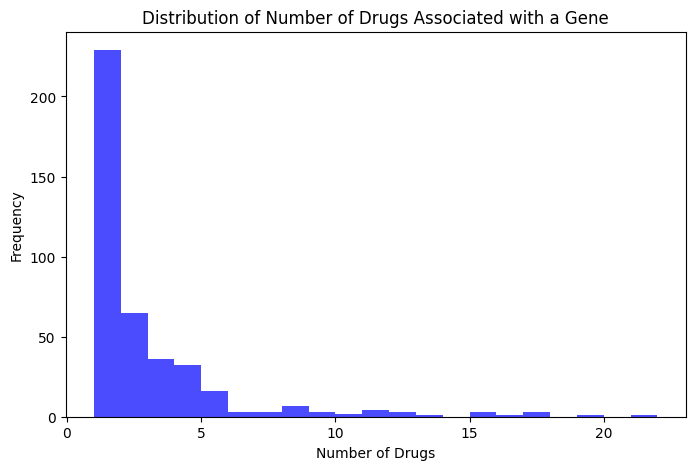

In [20]:
# Count the number of drugs associated with a gene
drug_counts = summary_df.groupby('GENE_SYMBOL')['DRUG_NAME'].nunique()

# Compute the maximum value of durg, which is the maximum number of drugs associated with a gene
drug_counts.max()

# Plot histogram for the number of drugs associated with a gene
plt.figure(figsize = (8, 5))
plt.hist(drug_counts, bins = range(1, drug_counts.max() + 2), alpha = 0.7, color = 'blue') # +2 is added to ensure that the last bin includes the maximum value
plt.title('Distribution of Number of Drugs Associated with a Gene')
plt.xlabel('Number of Drugs')
plt.ylabel('Frequency')
plt.show()


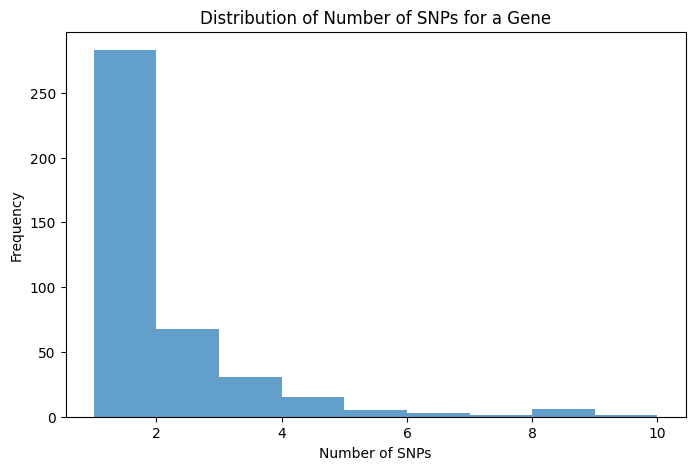

In [21]:
# Count the number of SNPs for each gene

# Group the DataFrame by 'GENE_SYMBOL' and extract the 'dbSNP_ID' column within each group
snp_id = summary_df.groupby('GENE_SYMBOL')['dbSNP_ID']

# Use a lambda function to calculate the count of unique SNPs within each group
# First split each element in the 'dbSNP_ID' group by ';'
# Then transform lists of values within each group into separate rows
# Convert the exploded values into a set
# Calculate the length of the set
agg_function = lambda x: len(set(x.str.split(';').explode()))

# Apply the function to each group to get SNP counts
snp_counts = snp_id.apply(agg_function)

# Compute the maximum value of SNP, which is the maximum number of SNPs associated with a gene
snp_counts.max()

# Plot histogram for the number of SNPs for a gene
plt.figure(figsize = (8, 5))
plt.hist(snp_counts, bins = range(1, snp_counts.max() + 2), alpha = 0.7) # +2 is added to ensure that the last bin includes the maximum value
plt.title('Distribution of Number of SNPs for a Gene')
plt.xlabel('Number of SNPs')
plt.ylabel('Frequency')
plt.show()

##TASK 6

As a team decide on a new feature to implement that can answer a relevant biological question using these data and implement the feature

Within our combined database, we can search for the most commonly listed SNP.
Variations in SNPs play a pivotal role in foreseeing how an individual reacts to specific medications, their vulnerability to environmental elements like toxins, and the likelihood of developing certain diseases. This additional feature will assist researchers in identifying and hopefully prescribing medications based on the individual's genetic code.

In [22]:
# Within the dbSNP_ID column, there are certain relationships that have multiple SNPS assigned to them.
# Split multiple SNPs by semicolon, creating a list of all SNPs
all_snps = []
for index, row in summary_df.iterrows():
    snps = row['dbSNP_ID'].split(';')
    all_snps.extend(snps)

In [32]:
# Count occurrences of each SNP
snp_counter = Counter(all_snps)

In [24]:
# Find the most frequent SNP
most_common_snp = snp_counter.most_common(1)[0][0]
most_common_snp

'rs12979860'

In [33]:
# Create a new database with the most frequent SNP
most_frequent_SNP_df = summary_df[summary_df['dbSNP_ID'].str.contains(most_common_snp)]
most_frequent_SNP_df

,GENE_SYMBOL,DRUG_NAME,dbSNP_ID
550,IFNL3,atorvastatin,rs12979860
551,IFNL3,boceprevir,rs12979860
552,IFNL3,daclatasvir,rs12979860
553,IFNL3,deleobuvir,rs12979860
554,IFNL3,faldaprevir,rs12979860
555,IFNL3,interferon alfa-2a,rs8099917;rs12979860
556,IFNL3,interferon alfa-2b,rs8099917;rs12979860
557,IFNL3,interferon alfa-n1,rs8099917;rs12979860
558,IFNL3,interferons,rs8099917;rs12979860
559,IFNL3,ledipasvir,rs12979860


The most common SNP in our dataset is rs12979860. By searching in dbSNP (Database for Single Nucleotide Polymorphisms), we identified that this SNP is an intron variant and has benign clinical significance. Therefore, we tried to search for the most five common SNPs.

In [27]:
# Find the most common 5 SNPs
snp_counter.most_common(5)

# Another method: Counter(summary_df.dbSNP_ID.str.split(";").apply(pd.Series).stack().values).most_common(5)

[('rs12979860', 31),
 ('rs1801133', 22),
 ('rs1128503', 14),
 ('rs4680', 13),
 ('rs11615', 12)]

Then we searched for the second common SNP "rs1801133" which is a coding sequence variant or missense variant. The SNP influences more directly in disease when it is located within a gene[1]. SNP "rs1801133" might be more interesting for us to investigate the SNP-related disease and gene. We filtered the genes and drugs that contained "rs1801133" in our dataset.

In [36]:
coding_seq_SNP_df = summary_df[summary_df.dbSNP_ID.str.contains("rs1801133")]
coding_seq_SNP_df

,GENE_SYMBOL,DRUG_NAME,dbSNP_ID
252,CLCN6,methotrexate,rs1801133;rs1801131
684,MTHFR,Incl. Combinations,rs1801133;rs1801131
685,MTHFR,Vitamin B-complex,rs1801133;rs1801131
686,MTHFR,antipsychotics,rs1801133
687,MTHFR,benazepril,rs1801133;rs1801131
688,MTHFR,bevacizumab,rs1801133
689,MTHFR,capecitabine,rs1801133
690,MTHFR,chlorpromazine,rs1801133
691,MTHFR,cisplatin,rs1801133
692,MTHFR,clozapine,rs1801133


In [37]:
#Save the output as a new TSV file
coding_seq_SNP_df.to_csv("/content/most_frequent_coding_seq_SNP.tsv", sep="\t", index=False)

We initially investigated how this SNP is related to genes. In our list, most "rs1801133" is related to gene MTHFR with 21 drugs and also related to gene CLCN6 with only one drug. "rs1801133" is a SNP on the gene MTHFR, responsible for encoding the MTHFR protein involved in methylation pathway [2]. CLCN6 is identified as an MTHFR overlap gene, explaining why CLCN6 is also included in gene associated with this SNP in our dataset. A literature identified another variant on CLCN6 (rs9651118) and indicates that CLCN6 (rs9651118) and MTHFR gene (C667T rs1801133) are significantly associated with a higher risk of keratinocyte cancer in renal transplant recipients [2]. However, there is no specific research on the association between gene CLCN6 and variant "rs1801133". This observation, derived from our new feature's output, could facilitate further research on gene CLCN6 and variant "rs1801133".

Then we tried to explore the impacts of this SNP on diseases. Gene variants in the MTHFR are suggested to be associated with vascular diseases, thromboembolism, neural tube defects, schizophrenia, cancers, as well as neurodegenerative diseases, such as Alzheimer’s disease and Parkinson’s disease [3].  "rs1801133" variant has been mostly reported to be associated with Parkinson’s disease (PD) or coronary disease. It is found that "rs1801133" is significantly associated with Parkinson’s disease (PD) in the European and Asian populations via meta-analysis [4]. Based on our list for "rs1801133," researchers can explore the effectiveness or performance of the "rs1801133" variant-related drugs for Parkinson's disease (PD).


Additionally, our data can be utilized for personalized drug treatment plans. For each SNP, we can delve into their associations with drug metabolism or drug efficacy by consulting relevant drug response databases or research literature.

In the data we have acquired, we specifically focused on the correlation between antipsychotic drugs and rs1801133. By searching for [rs1801133 on the PharmGKB website](https://www.pharmgkb.org/variant/PA166153644/variantAnnotation),
 we found statistically significant variant annotations. Specifically, we learned that compared to allele A, allele G is associated with an increase in body weight in patients with affective disorders and schizophrenia receiving antipsychotic drug treatment.

This discovery provides robust support for formulating personalized drug treatment plans. By thoroughly examining the genetic information of patients, particularly emphasizing the alleles of rs1801133, physicians can more accurately predict the likelihood of weight gain in patients receiving antipsychotic drug treatment. This offers crucial guidance for physicians to adjust treatment plans, choose drugs more suitable for patients, or modify drug dosages, aiming to enhance treatment efficacy and reduce the potential risk of adverse reactions.

# References    
[1] https://medlineplus.gov/genetics/understanding/genomicresearch/snp/

[2] Griffin L, Ho L, Akhurst RJ, et al. Genetic polymorphism in Methylenetetrahydrofolate Reductase chloride transport protein 6 (MTHFR CLCN6) gene is associated with keratinocyte skin cancer in a cohort of renal transplant recipients. Skin Health Dis. 2022;2(2):e95. Published 2022 Feb 2. doi:10.1002/ski2.95    

[3] Yuan L, Song Z, Deng X, Xiong W, Yang Z, Deng H. Association of the MTHFR RS1801131 and RS1801133 variants in sporadic parkinson’s disease patients. *Neuroscience Letters*. 2016;616:26-31.doi:10.1016/j.neulet.2016.01.031   

[4] Zhu Z, Ai Q, Wang W, Xiao Z. Meta-analysis supports Association of a functional SNP (rs1801133) in the MTHFR gene with parkinson’s disease. *Gene*. 2013;531(1):78-83. doi:10.1016/j.gene.2013.07.034